# Proyecto Jorge

# Fase 1-Preprocesamiento datos

## Installation

In [1]:
#!pip install -U textblob
#!python -m textblob.download_corpora
#!pip install pyodbc
#!pip install pandas
#!pip install https://github.com/aboSamoor/pycld2/zipball/e3ac86ed4d4902e912691c1531d0c5645382a726
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
#!python -m pip install -U matplotlib
#!pip install -U scikit-learn
#!pip install mlxtend
#!python -m pip install statsmodels 
#!pip install seaborn
#!pip3 install pyclustering
#!pip install -U enum34

## SQL Connection

In [2]:
import pyodbc 

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-K41HITM;'
                      'Database=DataProtection;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
cursor.execute('SELECT @@version')

for i in cursor:
    print(i)

('Microsoft SQL Server 2019 (RTM-GDR) (KB5014356) - 15.0.2095.3 (X64) \n\tApr 29 2022 18:00:13 \n\tCopyright (C) 2019 Microsoft Corporation\n\tDeveloper Edition (64-bit) on Windows 10 Home 10.0 <X64> (Build 19044: )\n', )


## Imports

In [439]:
#def fn_Imports():
    #Standard modules
import pandas as pd
import time
import numpy as np
from enum import IntEnum

    #Text manipulation
from textblob import TextBlob
import pycld2 as cld2
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(nlp.vocab)

    #Graphs
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

    #Models
from nltk.cluster import KMeansClusterer, euclidean_distance,cosine_distance
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
    
from pyclustering.cluster.kmeans import kmeans_observer
from pyclustering.cluster.kmeans import kmeans_visualizer
from pyclustering.utils.metric import distance_metric
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn import datasets, neighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scl = StandardScaler()
    #return 1

    #Dataframes


In [438]:
fn_Imports()

1

## Data Cleansing and Processing

### Functions

In [313]:
def fn_lang_1(text):
    isReliable, textBytesFound, details = cld2.detect(text)
    return details[0][0]
def fn_lang_2(text):
    isReliable, textBytesFound, details = cld2.detect(text)
    return details[0][1]
def fn_lang_3(text):
    isReliable, textBytesFound, details = cld2.detect(text)
    return details[0][2]
def fn_lower(text):
    return text.lower()
def fn_wordcount(text):
    string=TextBlob(text)
    total=0
    for key in campaigndict:
        total=total+string.word_counts[key]
    return total
def fn_sentiment(text):
    res=TextBlob(text)
    return res.sentiment[0]
def fn_sentiment_obj(text):
    res=TextBlob(text)
    return res.sentiment[1]
def fn_PositivePhrases(text):
    phrase_matcher.add('Keywords', None, *PosPatterns)
    sentence = nlp (text)
    matched_phrases = phrase_matcher(sentence)
    iteration=0
    for match_id, start, end in matched_phrases:
        string_id = nlp.vocab.strings[match_id]  
        span = sentence[start:end] 
        iteration=iteration+1
        #print(match_id, string_id, start, end, span.text,iteration)
    return iteration
def fn_NegativePhrases(text):
    phrase_matcher.add('Keywords', None, *NegPatterns)
    sentence = nlp (text)
    matched_phrases = phrase_matcher(sentence)
    iteration=0
    for match_id, start, end in matched_phrases:
        string_id = nlp.vocab.strings[match_id]  
        span = sentence[start:end] 
        iteration=iteration+1
        #print(match_id, string_id, start, end, span.text,iteration)
    return iteration
def fn_GetCallsToReject(frame):
    x_label=agg['label'].iloc[0]
    x_count=agg['count'].iloc[0]
    y_label=agg['label'].iloc[1]
    y_count=agg['count'].iloc[1]
    if x_count>y_count:
        return x_label
    else:
        return y_label
def fn_GetCallsToListen(frame):
    x_label=agg['label'].iloc[0]
    x_count=agg['count'].iloc[0]
    y_label=agg['label'].iloc[1]
    y_count=agg['count'].iloc[1]
    if x_count<y_count:
        return x_label
    else:
        return y_label
def fn_plotresults():
    dfpred=pd.DataFrame()
    dfpred['label']=label
    plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
    plot1.set_title('Call Recordings Distribution')
    agg=pd.DataFrame()
    agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
    agg.columns=['label','count']

In [5]:
cursor = conn.cursor()
cursor.execute('execute prj.sp_SetInitialDataset')

In [6]:
RawData=pd.read_sql_query('SELECT * FROM prj.vw_InitialData', conn)

In [7]:
RawData

,RowID,CodeSentiment,startDateKey,duration,transcript,startTime,campaignId,campaignName,Lenght
0,161,2,2020-04-07,179,"Thank you for calling, États, this is Michelle...",2020-04-07 14:14:40.087,2020020005,Microsoft Dynamics AX Migration,2183
1,176,-1,2020-04-07,133,"Si mira, ahora que tengo ti Hola, buenas tarde...",2020-04-07 14:22:38.307,2018070054,SMB Tele FY20 WE,1747
2,177,2,2020-04-07,186,Bienvenidos al Real Club La Moraleja para cont...,2020-04-07 14:23:09.337,2018070054,SMB Tele FY20 WE,782
3,189,1,2020-04-07,178,Welcome to the Gibraltar Financial Services Co...,2020-04-07 14:29:18.443,2018070054,SMB Tele FY20 WE,346
4,204,-1,2020-04-07,341,Hochtechnologie soll so sein Presse StorSimple...,2020-04-07 14:34:13.827,2018070054,SMB Tele FY20 WE,1885
...,...,...,...,...,...,...,...,...,...
2528,287525,1,2021-03-11,241,Está usted llamando a Joie Guardi Ibérica? Si ...,2021-03-11 14:21:42.033,2020020005,Microsoft Dynamics AX Migration,833
2529,287565,1,2021-03-11,149,Gracias por llamar a Manuel Salado Ríos S.L.U....,2021-03-11 14:37:03.220,2020020005,Microsoft Dynamics AX Migration,981
2530,287586,1,2021-03-11,140,Bienvenidos a hijos de Juan Pujante. Por favor...,2021-03-11 14:44:26.060,2020020005,Microsoft Dynamics AX Migration,492
2531,279362,1,2021-01-28,144,"Thank you for calling in corp headquarters, th...",2021-01-28 21:45:18.133,2020020005,Microsoft Dynamics AX Migration,1823


In [8]:
RawData['startDateKey']=RawData['startDateKey'].astype("string")
RawData['duration']=RawData['duration'].astype("int64")
RawData['transcript']=RawData['transcript'].astype("string")
RawData['campaignId']=RawData['campaignId'].astype("string")
RawData['campaignName']=RawData['campaignName'].astype("string")

In [9]:
for col in RawData.columns:
    print(col)

RowID
CodeSentiment
startDateKey
duration
transcript
startTime
campaignId
campaignName
Lenght


In [10]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RowID          2533 non-null   int64         
 1   CodeSentiment  2533 non-null   int64         
 2   startDateKey   2533 non-null   string        
 3   duration       2533 non-null   int64         
 4   transcript     2533 non-null   string        
 5   startTime      2533 non-null   datetime64[ns]
 6   campaignId     2533 non-null   string        
 7   campaignName   2533 non-null   string        
 8   Lenght         2533 non-null   int64         
dtypes: datetime64[ns](1), int64(4), string(4)
memory usage: 178.2 KB


## Keywords dictionaries

In [11]:
positivephrases = ['machine learning', 'robots', 'intelligent agents','microsoft dynamics',
                   'virtual machine','artificial intelligence','on premise','dynamics 365',
                   'office 365','Microsoft Partner','Microsoft Edge Advisor','Dynamics 365 Migration Program',
                  '365 for Education','365 Personal','Active Directory','.NET framework','Analysis Services',
                  'Azure Data Lake Store','Azure VPN Gateway']

PosPatterns = [nlp(text) for text in positivephrases]

In [12]:
negativephrases = ['voice mail','take a message','leave your message','take your call right now','not with company',
                   'give me a call back','work here anymore']

NegPatterns = [nlp(text) for text in negativephrases]

In [13]:
campaigndict=['crm','sql','azure','office','erp','dynamics','money','license','contract',
              'renewal','edge','outlook','migration','.net']


In [14]:
campaigndict

['crm',
 'sql',
 'azure',
 'office',
 'erp',
 'dynamics',
 'money',
 'license',
 'contract',
 'renewal',
 'edge',
 'outlook',
 'migration',
 '.net']

### Aplicando funciones de texto y tokenizacion

In [15]:
RawData['_transcript'] = RawData.apply(lambda row : fn_lower(row['transcript']), axis = 1)
RawData['_sentiment'] = RawData.apply(lambda row : fn_sentiment(row['_transcript']), axis = 1)
RawData['_sentimentobj'] = RawData.apply(lambda row : fn_sentiment_obj(row['_transcript']), axis = 1)
RawData['Language'] = RawData.apply(lambda row : fn_lang_1(row['_transcript']), axis = 1)
RawData['LanguageIso'] = RawData.apply(lambda row : fn_lang_2(row['_transcript']), axis = 1)
RawData['LanguageAccuracy'] = RawData.apply(lambda row : fn_lang_3(row['_transcript']), axis = 1)

RawData['Language']=RawData['Language'].astype("string")
RawData['LanguageIso']=RawData['LanguageIso'].astype("string")
RawData['_transcript']=RawData['_transcript'].astype("string")

RawData['KeyWordCount'] = RawData.apply(lambda row : fn_wordcount(row['_transcript']), axis = 1)
RawData['PosPhrases'] = RawData.apply(lambda row : fn_PositivePhrases(row['_transcript']), axis = 1)
RawData['NegPhrases'] = RawData.apply(lambda row : fn_NegativePhrases(row['_transcript']), axis = 1)



In [16]:
RawData

,RowID,CodeSentiment,startDateKey,duration,transcript,startTime,campaignId,campaignName,Lenght,_transcript,_sentiment,_sentimentobj,Language,LanguageIso,LanguageAccuracy,KeyWordCount,PosPhrases,NegPhrases
0,161,2,2020-04-07,179,"Thank you for calling, États, this is Michelle...",2020-04-07 14:14:40.087,2020020005,Microsoft Dynamics AX Migration,2183,"thank you for calling, états, this is michelle...",0.230672,0.457925,ENGLISH,en,99,1,0,1
1,176,-1,2020-04-07,133,"Si mira, ahora que tengo ti Hola, buenas tarde...",2020-04-07 14:22:38.307,2018070054,SMB Tele FY20 WE,1747,"si mira, ahora que tengo ti hola, buenas tarde...",0.000000,0.000000,SPANISH,es,99,0,0,0
2,177,2,2020-04-07,186,Bienvenidos al Real Club La Moraleja para cont...,2020-04-07 14:23:09.337,2018070054,SMB Tele FY20 WE,782,bienvenidos al real club la moraleja para cont...,0.150000,0.366667,SPANISH,es,99,0,0,0
3,189,1,2020-04-07,178,Welcome to the Gibraltar Financial Services Co...,2020-04-07 14:29:18.443,2018070054,SMB Tele FY20 WE,346,welcome to the gibraltar financial services co...,-0.064286,0.614286,ENGLISH,en,99,0,0,0
4,204,-1,2020-04-07,341,Hochtechnologie soll so sein Presse StorSimple...,2020-04-07 14:34:13.827,2018070054,SMB Tele FY20 WE,1885,hochtechnologie soll so sein presse storsimple...,-0.095833,0.492708,GERMAN,de,89,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,287525,1,2021-03-11,241,Está usted llamando a Joie Guardi Ibérica? Si ...,2021-03-11 14:21:42.033,2020020005,Microsoft Dynamics AX Migration,833,está usted llamando a joie guardi ibérica? si ...,0.000000,0.000000,SPANISH,es,67,0,0,0
2529,287565,1,2021-03-11,149,Gracias por llamar a Manuel Salado Ríos S.L.U....,2021-03-11 14:37:03.220,2020020005,Microsoft Dynamics AX Migration,981,gracias por llamar a manuel salado ríos s.l.u....,0.000000,0.000000,SPANISH,es,99,0,0,0
2530,287586,1,2021-03-11,140,Bienvenidos a hijos de Juan Pujante. Por favor...,2021-03-11 14:44:26.060,2020020005,Microsoft Dynamics AX Migration,492,bienvenidos a hijos de juan pujante. por favor...,0.500000,0.500000,SPANISH,es,99,0,0,0
2531,279362,1,2021-01-28,144,"Thank you for calling in corp headquarters, th...",2021-01-28 21:45:18.133,2020020005,Microsoft Dynamics AX Migration,1823,"thank you for calling in corp headquarters, th...",0.187317,0.471043,ENGLISH,en,99,0,0,0


### Exportando a SQL

In [17]:
cursor = conn.cursor()
cursor.execute('truncate table prj.tb_InputData')

In [18]:
cursor = conn.cursor()
# Insert Dataframe into SQL Server:
for index, row in RawData.iterrows():
     cursor.execute("INSERT INTO prj.tb_InputData values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"
,row.RowID
,row.CodeSentiment
,row.startDateKey
,row.duration
,row.transcript
,row.startTime
,row.campaignId
,row.campaignName
,row.Lenght
,row._transcript
,row._sentiment
,row._sentimentobj
,row.Language
,row.LanguageIso
,row.LanguageAccuracy
,row.KeyWordCount
,row.PosPhrases
,row.NegPhrases)
conn.commit()
cursor.close()

# Fase 2-Algoritmo

## Exportar Datos entrada

In [19]:
InputData=pd.read_sql_query('SELECT * FROM prj.vw_ModelInputData', conn)

In [20]:
#Remover columna RowID
X=InputData.loc[:, InputData.columns != 'RowId']

In [21]:
InputData

,RowId,Duration,Lenght,Sentiment,SentimentScore,KeyWordCount,PosPhrases,NegPhrases
0,161,179,2183,0.231,0.458,1,0,1
1,189,178,346,-0.064,0.614,0,0,0
2,437,136,1325,0.351,0.497,2,1,2
3,460,135,1050,0.215,0.525,2,1,1
4,464,175,2045,0.264,0.479,1,0,1
...,...,...,...,...,...,...,...,...
1597,290759,124,1140,0.012,0.587,0,0,0
1598,315524,145,1207,0.131,0.484,3,2,3
1599,293430,223,2610,0.291,0.473,6,4,4
1600,279362,144,1823,0.187,0.471,0,0,0


In [22]:
InputData['_Duration'] =pd.cut(InputData['Duration'],3,labels=["Short", "Medium", "Large"])

In [23]:
InputData['_Lenght'] =pd.cut(InputData['Lenght'],3,labels=["Short", "Medium", "Large"])

In [24]:
InputData

,RowId,Duration,Lenght,Sentiment,SentimentScore,KeyWordCount,PosPhrases,NegPhrases,_Duration,_Lenght
0,161,179,2183,0.231,0.458,1,0,1,Short,Short
1,189,178,346,-0.064,0.614,0,0,0,Short,Short
2,437,136,1325,0.351,0.497,2,1,2,Short,Short
3,460,135,1050,0.215,0.525,2,1,1,Short,Short
4,464,175,2045,0.264,0.479,1,0,1,Short,Short
...,...,...,...,...,...,...,...,...,...,...
1597,290759,124,1140,0.012,0.587,0,0,0,Short,Short
1598,315524,145,1207,0.131,0.484,3,2,3,Short,Short
1599,293430,223,2610,0.291,0.473,6,4,4,Short,Short
1600,279362,144,1823,0.187,0.471,0,0,0,Short,Short


In [25]:
#Data Aggregation
kw=pd.DataFrame()
kw=InputData['KeyWordCount'].value_counts(ascending=False).reset_index()
kw.columns=['item','count']

pp=pd.DataFrame()
pp=InputData['PosPhrases'].value_counts(ascending=False).reset_index()
pp.columns=['item','count']

np=pd.DataFrame()
np=InputData['NegPhrases'].value_counts(ascending=False).reset_index()
np.columns=['item','count']

cd=pd.DataFrame()
cd=InputData['_Duration'].value_counts(ascending=False).reset_index()
cd.columns=['item','count']

## Data Review 

Text(0.5, 1.0, 'Negative Phrases')

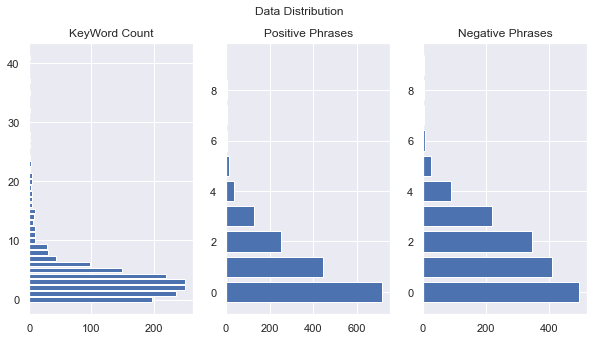

In [27]:
fig,axes = plt.subplots(2,3, figsize=(10,5))
fig.suptitle('Data Distribution')


plot1 = plt.subplot2grid((1,3), (0, 0))
plot1.barh('item', 'count', data=kw_sorted)
plot1.set_title('KeyWord Count')

plot2 = plt.subplot2grid((1, 3), (0, 1))
plot2.barh('item', 'count', data=pp)
plot2.set_title('Positive Phrases')

plot3 = plt.subplot2grid((1, 3), (0, 2))
plot3.barh('item', 'count', data=np)
plot3.set_title('Negative Phrases')

#plot4 = plt.subplot2grid((1, 3), (1, 0))
#plot4.barh('item', 'count', data=cd)
#plot4.set_title('Call Duration')











## Model

### Scikit-Learn

In [540]:
#Refresh imports
#fn_Imports()
Summary=pd.DataFrame()

Elbow Criteria

Text(0, 0.5, 'WCSS')

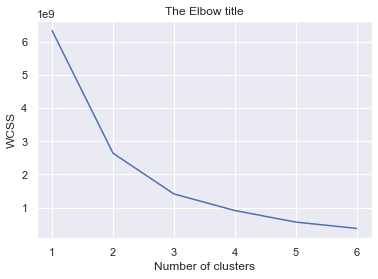

In [541]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

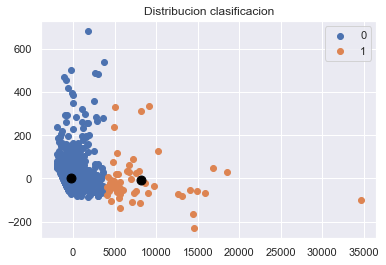

In [542]:
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'Default','Linkage':'default','Distance':'euclidean','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2,random_state=1234,n_init=100,max_iter=5,algorithm='elkan')
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']


#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[0,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[0,'Samples']=len(dfpred.index)
Summary.at[0,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[0,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[0,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

Agg Clustering

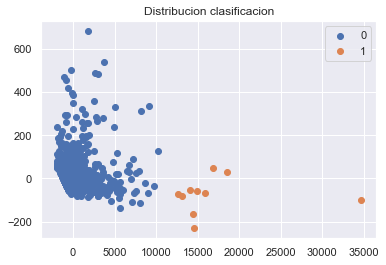

In [543]:
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'ward','Distance':'euclidean','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 

#predict the labels of clusters.
label = AgglomerativeClustering().fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[1,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[1,'Samples']=len(dfpred.index)
Summary.at[1,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[1,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[1,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

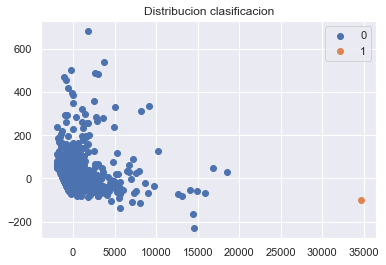

In [544]:
idx=2
distance="l1"
linkage="average"

insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'average','Distance':'l1','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 

#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

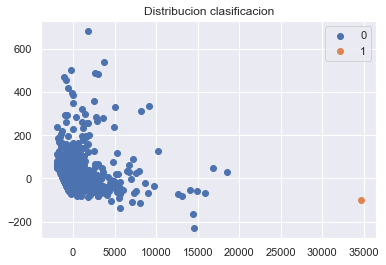

In [545]:
idx=3
distance="l1"
linkage="complete"

insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'complete','Distance':'l1','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

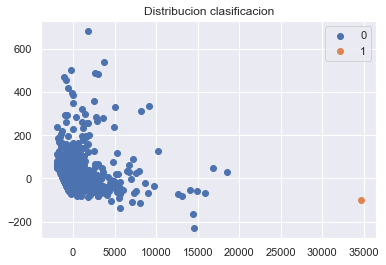

In [546]:
idx=4
distance="manhattan"
linkage="average"
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'average','Distance':'manhattan','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 

#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

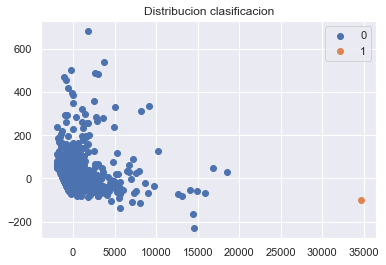

In [547]:
idx=5
distance="manhattan"
linkage="complete"
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'complete','Distance':'manhattan','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module

 

#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

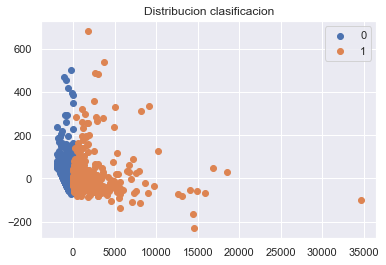

In [548]:
idx=6
distance="cosine"
linkage="average"
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'average','Distance':'cosine','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module

 
#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

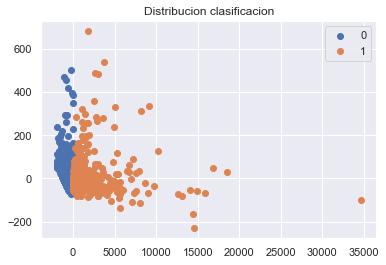

In [549]:
idx=7
distance="cosine"
linkage="complete"
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'complete','Distance':'cosine','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 

#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
toSave=dfpred
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

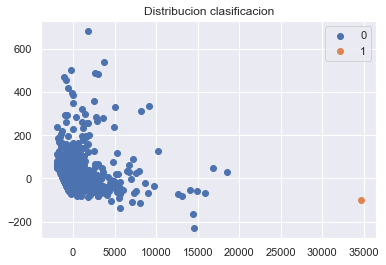

In [550]:
idx=idx+1
alg="AggClustering"
distance="l2"
linkage="average"
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'complete','Distance':'cosine','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 

#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Algorithm']=alg
Summary.at[idx,'Linkage']=linkage
Summary.at[idx,'Distance']=distance
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

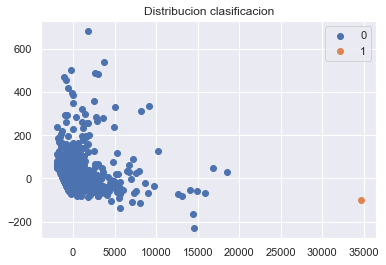

In [551]:
idx=idx+1
alg="AggClustering"
distance="l2"
linkage="complete"
insert= {'Model':'K-Means','Library':'Scikit-Learn','Algorithm':'AggClustering','Linkage':'complete','Distance':'cosine','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

#Load Data
#fn_Imports()
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 

#predict the labels of clusters.
label = AgglomerativeClustering(affinity=distance,linkage=linkage).fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
#centroids = kmeans.cluster_centers_


dfpred=pd.DataFrame()
dfpred['label']=label
#plot1=dfpred['label'].value_counts(sort=False,ascending=True).plot.bar()
#plot1.set_title('Call Recordings Distribution')
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

#Update Summary
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Algorithm']=alg
Summary.at[idx,'Linkage']=linkage
Summary.at[idx,'Distance']=distance
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Distribucion clasificacion')
plt.show()

In [552]:
Summary

,Model,Library,Algorithm,Linkage,Distance,Samples,ToListen,ToReject,Ratio,Silhouette
0,K-Means,Scikit-Learn,Default,default,euclidean,1602.0,53.0,1549.0,3.31%,0.873
1,K-Means,Scikit-Learn,AggClustering,ward,euclidean,1602.0,10.0,1592.0,0.62%,0.923
2,K-Means,Scikit-Learn,AggClustering,average,l1,1602.0,1.0,1601.0,0.06%,0.958
3,K-Means,Scikit-Learn,AggClustering,complete,l1,1602.0,1.0,1601.0,0.06%,0.958
4,K-Means,Scikit-Learn,AggClustering,average,manhattan,1602.0,1.0,1601.0,0.06%,0.958
5,K-Means,Scikit-Learn,AggClustering,complete,manhattan,1602.0,1.0,1601.0,0.06%,0.958
6,K-Means,Scikit-Learn,AggClustering,average,cosine,1602.0,395.0,1207.0,24.66%,0.604
7,K-Means,Scikit-Learn,AggClustering,complete,cosine,1602.0,410.0,1192.0,25.59%,0.592
8,K-Means,Scikit-Learn,AggClustering,average,l2,1602.0,1.0,1601.0,0.06%,0.958
9,K-Means,Scikit-Learn,AggClustering,complete,l2,1602.0,1.0,1601.0,0.06%,0.958


### NTLK

In [553]:
insert= {'Model':'K-Means','Library':'NTLK','Linkage':'Default','Distance':'euclidean','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

In [554]:
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=euclidean_distance, repeats=25)
label = kclusterer.cluster(df, assign_clusters=True)

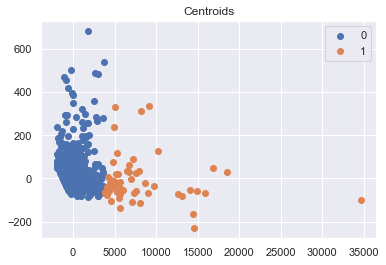

In [555]:
#Getting the Centroids
#centroids = kmeans.cluster_centers_
#centroids = kclusterer._centroid
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Centroids')
plt.show()

In [556]:
dfpred=pd.DataFrame()
dfpred['label']=label
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

In [557]:
idx=idx+1
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Algorithm']="default"
Summary.at[idx,'Linkage']="default"
Summary.at[idx,'Distance']=distance
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

In [558]:
Summary

,Model,Library,Algorithm,Linkage,Distance,Samples,ToListen,ToReject,Ratio,Silhouette
0,K-Means,Scikit-Learn,Default,default,euclidean,1602.0,53.0,1549.0,3.31%,0.873
1,K-Means,Scikit-Learn,AggClustering,ward,euclidean,1602.0,10.0,1592.0,0.62%,0.923
2,K-Means,Scikit-Learn,AggClustering,average,l1,1602.0,1.0,1601.0,0.06%,0.958
3,K-Means,Scikit-Learn,AggClustering,complete,l1,1602.0,1.0,1601.0,0.06%,0.958
4,K-Means,Scikit-Learn,AggClustering,average,manhattan,1602.0,1.0,1601.0,0.06%,0.958
5,K-Means,Scikit-Learn,AggClustering,complete,manhattan,1602.0,1.0,1601.0,0.06%,0.958
6,K-Means,Scikit-Learn,AggClustering,average,cosine,1602.0,395.0,1207.0,24.66%,0.604
7,K-Means,Scikit-Learn,AggClustering,complete,cosine,1602.0,410.0,1192.0,25.59%,0.592
8,K-Means,Scikit-Learn,AggClustering,average,l2,1602.0,1.0,1601.0,0.06%,0.958
9,K-Means,Scikit-Learn,AggClustering,complete,l2,1602.0,1.0,1601.0,0.06%,0.958


In [559]:
insert= {'Model':'K-Means','Library':'NTLK','Distance':'cosine','Samples':0,'ToListen':0,'ToReject':0,'Ratio':'0','Silhouette':0.0}
Summary = Summary.append(insert, ignore_index = True)

In [560]:
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=cosine_distance, repeats=25)
label = kclusterer.cluster(df, assign_clusters=True)

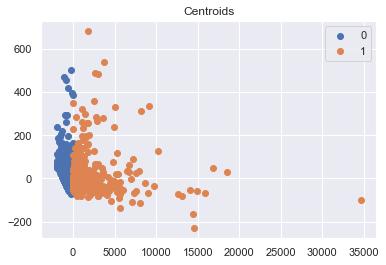

In [561]:
#Getting the Centroids
#centroids = kmeans.cluster_centers_
#centroids = kclusterer._centroid
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title('Centroids')
plt.show()

In [562]:
dfpred=pd.DataFrame()
dfpred['label']=label
agg=pd.DataFrame()
agg=dfpred['label'].value_counts(sort=False,ascending=True).reset_index()
agg.columns=['label','count']

In [563]:
idx=idx+1
to_listen=fn_GetCallsToListen(agg)
to_reject=fn_GetCallsToReject(agg)
Summary.at[idx,'Algorithm']="default"
Summary.at[idx,'Linkage']="default"
Summary.at[idx,'Silhouette']=round(metrics.silhouette_score(df, label,metric='euclidean'),3)
Summary.at[idx,'Samples']=len(dfpred.index)
Summary.at[idx,'ToReject']=int(dfpred['label'].value_counts()[to_reject])
Summary.at[idx,'ToListen']=dfpred['label'].value_counts()[to_listen]
Summary.at[idx,'Ratio']=str(round((dfpred['label'].value_counts()[to_listen]/len(dfpred.index))*100,2))+'%'

In [564]:
Summary

,Model,Library,Algorithm,Linkage,Distance,Samples,ToListen,ToReject,Ratio,Silhouette
0,K-Means,Scikit-Learn,Default,default,euclidean,1602.0,53.0,1549.0,3.31%,0.873
1,K-Means,Scikit-Learn,AggClustering,ward,euclidean,1602.0,10.0,1592.0,0.62%,0.923
2,K-Means,Scikit-Learn,AggClustering,average,l1,1602.0,1.0,1601.0,0.06%,0.958
3,K-Means,Scikit-Learn,AggClustering,complete,l1,1602.0,1.0,1601.0,0.06%,0.958
4,K-Means,Scikit-Learn,AggClustering,average,manhattan,1602.0,1.0,1601.0,0.06%,0.958
5,K-Means,Scikit-Learn,AggClustering,complete,manhattan,1602.0,1.0,1601.0,0.06%,0.958
6,K-Means,Scikit-Learn,AggClustering,average,cosine,1602.0,395.0,1207.0,24.66%,0.604
7,K-Means,Scikit-Learn,AggClustering,complete,cosine,1602.0,410.0,1192.0,25.59%,0.592
8,K-Means,Scikit-Learn,AggClustering,average,l2,1602.0,1.0,1601.0,0.06%,0.958
9,K-Means,Scikit-Learn,AggClustering,complete,l2,1602.0,1.0,1601.0,0.06%,0.958


## Final Data Export

In [565]:
OutputData=InputData.join(toSave) 

In [566]:
cursor = conn.cursor()
cursor.execute('truncate table prj.tb_OutputData')

In [567]:
cursor = conn.cursor()
# Insert Dataframe into SQL Server:
for index, row in OutputData.iterrows():
     cursor.execute("INSERT INTO prj.tb_OutputData values(?,?,?,?,?,?,?,?,?,?,?)"
,row.RowId
,row.Duration
,row.Lenght
,row.Sentiment       
,row.SentimentScore
,row.KeyWordCount
,row.PosPhrases
,row.NegPhrases
,row._Duration
,row._Lenght
,row.label
)
conn.commit()
cursor.close()

In [568]:
OutputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RowId           1602 non-null   int64   
 1   Duration        1602 non-null   int64   
 2   Lenght          1602 non-null   int64   
 3   Sentiment       1602 non-null   float64 
 4   SentimentScore  1602 non-null   float64 
 5   KeyWordCount    1602 non-null   int64   
 6   PosPhrases      1602 non-null   int64   
 7   NegPhrases      1602 non-null   int64   
 8   _Duration       1602 non-null   category
 9   _Lenght         1602 non-null   category
 10  label           1602 non-null   int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 116.2 KB
